Matriz de Covariância:
[[9.50056770e-05 3.73376856e-05 2.52670961e-05 3.24008953e-05
  2.75049649e-03]
 [3.73376856e-05 1.83356531e-05 9.42550656e-06 9.57652599e-06
  1.08510054e-03]
 [2.52670961e-05 9.42550656e-06 1.10488409e-05 4.79274872e-06
  6.59413144e-04]
 [3.24008953e-05 9.57652599e-06 4.79274872e-06 1.80316206e-05
  1.00598280e-03]
 [2.75049649e-03 1.08510054e-03 6.59413144e-04 1.00598280e-03
  9.36940488e-02]]

Autovalores:
[ 9.38028233e-02  1.97609242e-05 -6.79302455e-20  9.60561230e-06
  4.28073346e-06]

Autovetores:
[[-2.93450300e-02 -8.32264786e-01  5.00000000e-01 -2.37253298e-01
  -1.36039359e-02]
 [-1.15769237e-02 -3.69757082e-01 -5.00000000e-01  2.86566776e-01
  -7.28714730e-01]
 [-7.03614627e-03 -4.08204368e-01 -5.00000000e-01  3.39873052e-01
   6.83963446e-01]
 [-1.07319601e-02 -5.43033355e-02 -5.00000000e-01 -8.63693126e-01
   3.11473486e-02]
 [-9.99419913e-01  3.21771171e-02  9.23759260e-17  1.05284746e-02
   3.69088481e-03]]

Dois maiores autovalores:
(0.093802823

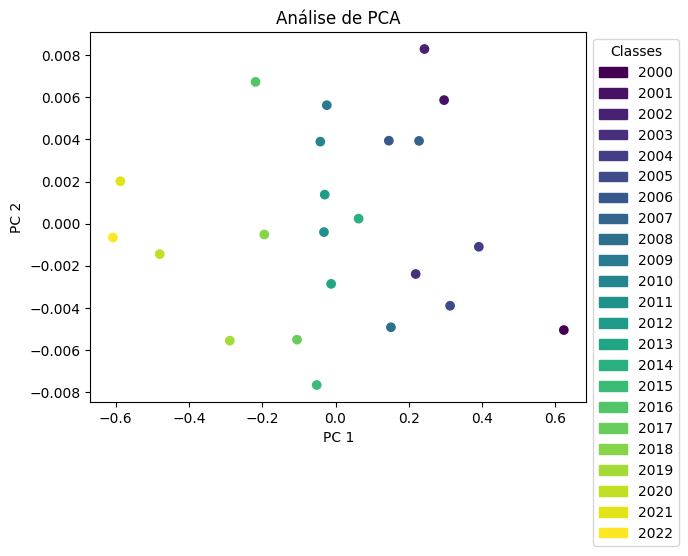

In [25]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os
# Load the data in folder data
path = "files"
files = os.listdir(path)

#Utilizado pandas para carregamento do CSV
obitoPeriodo = pd.read_csv(path + "/" + "obitosinfantis_periodo.csv", delimiter=";")
ano = obitoPeriodo["ano"]
obitoPeriodo = obitoPeriodo.drop(columns=["ano"])
obitoPeriodo["Ano"] = ano
obitoPeriodo = obitoPeriodo.query("cod_ibge == 3548500")
data = obitoPeriodo
data.dropna(inplace=True)
data.drop_duplicates()
data["nascidos_vivos"] = pd.to_numeric(data["nascidos_vivos"].str.replace(",", "."), errors='coerce')
data = data.drop(columns=["cod_ibge"])
data.to_excel("obitosinfantis_periodo.xlsx", index=False)

# Separar as features dos rótulos
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Tratar valores ausentes
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Normalizar os dados
X = (X - np.mean(X)) / np.std(X)

# Calcular e imprimir a matriz de covariância
cov_matrix = np.cov(X.T)
print("Matriz de Covariância:")
print(cov_matrix)

# Calcular e imprimir os autovalores e autovetores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nAutovalores:")
print(eigenvalues)
print("\nAutovetores:")
print(eigenvectors)

# Ordenar os autovalores e autovetores em ordem decrescente
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Selecionar os dois maiores autovalores e autovetores
top_eigenvalues = eigen_pairs[0][0], eigen_pairs[1][0]
top_eigenvectors = eigen_pairs[0][1], eigen_pairs[1][1]

print("\nDois maiores autovalores:")
print(top_eigenvalues)
print("\nDois maiores autovetores:")
print(top_eigenvectors)

# Aplicar PCA com 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Converter rótulos para valores numéricos
label_map = {name: i for i, name in enumerate(np.unique(y))}
y_numeric = np.array([label_map[label] for label in y])

# Visualizar os resultados
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='viridis')

# Adicionar legendas para as classes
legend_labels = np.unique(y)
handles = [Patch(color=scatter.cmap(scatter.norm(label_map[label])), label=label) for label in legend_labels]
plt.legend(handles=handles, bbox_to_anchor=(1,1), title="Classes")

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Análise de PCA')
plt.show()